## import data from csv file

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_csv("glass.csv",index_col=0)

## data

In [2]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


## replace labels to int values(from 0 to 6)

In [3]:
data['Type'] = data['Type'].replace({'building_windows_float_processed' : 0, 'building_windows_non_float_processed' : 1,
                                     'vehicle_windows_float_processed' : 2,  'vehicle_windows_non_float_processed'  : 3,
                                     'containers' : 4, 'tableware' : 5,'headlamps' : 6})

## check Nan-s in dataframe data

In [4]:
data.isnull().sum()

RI      1
Na      0
Mg      1
Al      1
Si      2
K       1
Ca      1
Ba      0
Fe      0
Type    0
dtype: int64

## mean values in each column data

In [5]:
data = data.fillna(data.mean())

## replace Nan -> mean

In [6]:
print('Nan:\n',data.isnull().sum())

Nan:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [7]:
from sklearn.utils import shuffle

## shuffle dataframe (to avoid rep.)

In [8]:
data = shuffle(data)

## shuffled data

In [9]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
93,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00,1
77,1.51627,13.00,3.58,1.54,72.83,0.61,8.04,0.00,0.00,1
118,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29,1
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,0
124,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00,1


## import split funct.

In [10]:
from sklearn.model_selection import train_test_split

## labels

In [11]:
labels = data['Type']
del data['Type']

In [12]:
X = data
Y = labels
set(list(Y))

{0, 1, 2, 4, 5, 6}

## split our data in 70/30 % 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

## train our classifier gauss. kernel and gamma=0.7
## and other default param.

In [14]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',gamma=0.7)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## prediction
## testing our model

In [15]:
from sklearn import metrics

y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7076923076923077


## correlation between features in data

In [16]:
correlation = data.corr()

## plot

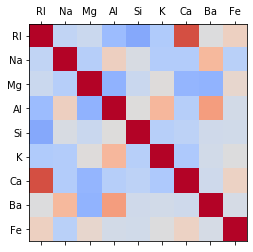

In [17]:

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='coolwarm', vmin=-1, vmax=1)

#fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)

#plt.xticks(rotation=90)

ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

plt.show()